In [2]:
import pandas as pd
import numpy as np
import pickle
import json

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from scipy.spatial import ConvexHull
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


In [3]:
import plotting as pltt

In [4]:
soil_on_ax = lambda ax: pltt.plot_box(ax, -56, 56, -45, 45, 42, 42+30, color='brown', alpha=.5, label='Soil', zorder=1)


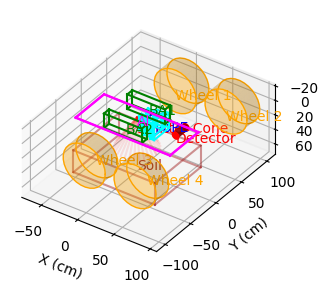

In [6]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'}, figsize=(3, 3))
pltt.plot_MCNP(ax)
pltt.plot_cone(ax, pos=(0, 0, 0), vec=(0.0, 0, 1.0), dir=np.degrees(np.cos(.95)), length=40, color='red', alpha=.1, label='Emitter Cone', zorder=2000)

soil_on_ax(ax)
pltt.extra(ax)
# ax.set_yticklabels([])
# ax.set_yticks([]) 
# ax.set_ylabel('')
ax.view_init(elev=35, azim=-90+35,)
plt.tight_layout()
ax.set_aspect('equal')
plt.savefig('../../Figures/DataGeneration/MCNPGeometry.png', dpi=100, bbox_inches='tight')
plt.show()


In [7]:

y0 = 0.0
y1 = 10.0
x0 = 0
x1 = 30


def lineardepth(X):
    z = X[:, 2]
    y = (y1 - y0) / (x1 - x0) * (z - x0) + y0
    return y

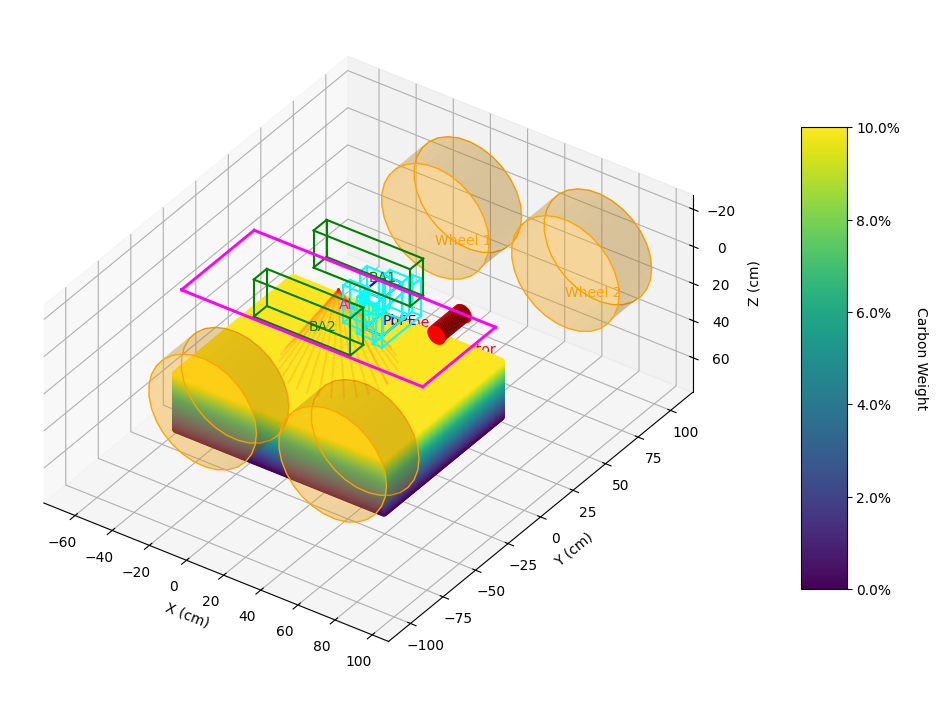

In [8]:
# 3d plot linear depth
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'}, figsize=(12, 12))
# 3d meshgrid
x = np.linspace(-56, 56, 100)
y = np.linspace(-45, 45, 100)
z = np.linspace(0, 30, 100)
X = np.meshgrid(x, y, z)
X = np.array(X).reshape(3, -1).T
# plot linear depth
ax.scatter(X[:, 0], X[:, 1], 42+30-X[:, 2], c=lineardepth(X), alpha=1, label='Linear Depth', zorder=0)
# add colorbar
cbar = plt.colorbar(ax.collections[0], ax=ax, pad=0.1, aspect=10, shrink=0.5)
cbar.set_label('Carbon Weight', rotation=270, labelpad=20)
# add percentage symbol to colorbar tick labels
cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))
cbar.ax.tick_params(labelsize=10)

pltt.plot_MCNP(ax)
pltt.plot_cone(ax, pos=(0, 0, 0), vec=(0.0, 0, 1.0), dir=np.degrees(np.cos(.95)), length=40, color='red', alpha=.1, label='Emitter Cone', zorder=2000)

soil_on_ax(ax)
pltt.extra(ax)
# ax.set_yticklabels([])
# ax.set_yticks([]) 
# ax.set_ylabel('')
ax.view_init(elev=35, azim=-90+35,)
ax.set_aspect('equal')
plt.savefig('../../Figures/FunctionallyDefinedSoil/Carbonasafunctioninthesoil.png', dpi=300, bbox_inches='tight')
plt.show()